# Distribuciones y derivadas de distribuciones
En este notebook ilustramos ejemplos de sucesiones que tienden a distribuciones conocidas, y calculamos las derivadas de algunas de estas sucesiones. Para hacer manipulación simbólica usamos SymPy (https://docs.sympy.org/latest/tutorial/index.html), y para calcular y graficar funciones usamos NumPy (https://numpy.org/devdocs/user/quickstart.html) y Matplotlib (https://matplotlib.org/3.3.0/tutorials/index.html). Comenzamos con código para que Sympy funcione automáticamente en Google colab, o en notebooks Jupyter si alguno de ustedes tiene Python y Jupyter instalado y decide ejecutarlo en sus computadoras. Cada celda a continuación se ejecuta apretando SHIFT+ENTER:

In [1]:
# El código en esta celda asegura que SymPy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

In [2]:
# El código en esta celda importa NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

Graficamos numéricamente un sucesión de funciones Gaussianas usando NumPy y Matplotlib. Notar que para expresiones matemáticas como la raíz y la exponencial usamos "np.sqrt(x)" y "np.exp(x)". De esta forma nos aseguramos estar usando la versión numérica de NumPy, y no las expresiones simbólicas de SymPy:

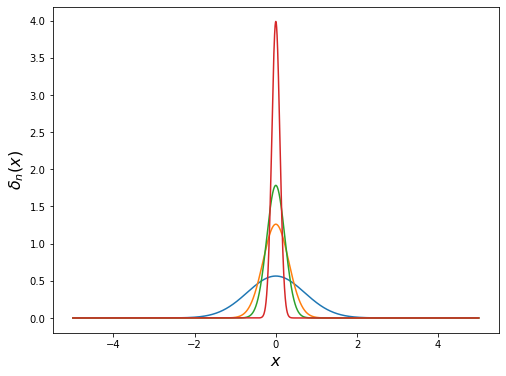

In [3]:
# Definimos la función delta_n, donde n controla el ancho de la campana
def delta(x,n):
    y = np.sqrt(n/np.pi)*np.exp(-n*x**2)
    return y

# Armamos un vector que toma valores entre -5 y 5, con un paso de 0.001
y = np.arange(-5,5,.001)   

# Graficamos la función para diferentes valores de n. Prueben variar los valores de n.
plt.figure(figsize=(8,6))
plt.plot(y, delta(y,1))
plt.plot(y, delta(y,5))
plt.plot(y, delta(y,10))
plt.plot(y, delta(y,50))
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\delta_n(x)$',fontsize=16)
plt.show()

Tomemos ahora una sucesión de funciones que tiende a la función de Heaviside. Definimos la función y la graficamos usando Matplotlib, para diferentes pendientes en el origen:

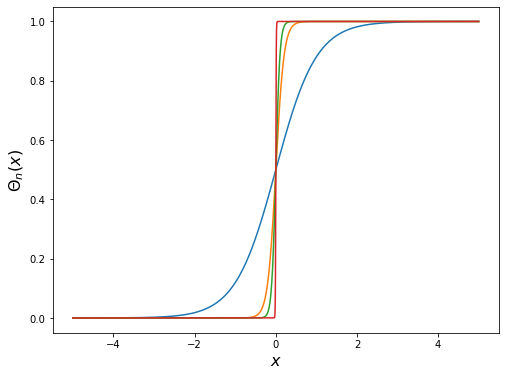

In [4]:
# Definimos la función heaviside_n, donde n controla la pendiente en el origen
def heavi(x,n):
    y = .5*(np.tanh(n*x)+1)
    return y

# Graficamos la función para diferentes valores de n. Prueben variar los valores de n.
plt.figure(figsize=(8,6))
plt.plot(y, heavi(y,1))
plt.plot(y, heavi(y,5))
plt.plot(y, heavi(y,10))
plt.plot(y, heavi(y,100))
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\Theta_n(x)$',fontsize=16)
plt.show()

Usemos ahora SymPy para calcular la derivada de esta función. Primero tenemos que definir símbolos (variables) y decirle a SymPy que esos símbolos son reales (también podríamos decirles que son complejos, o reales positivos, etc.). Luego podemos usar esos símbolos para hacer manipulación simbólica de expresiones matemáticas, como por ejemplo: derivar, integrar, simplificar, etc. (ver https://docs.sympy.org/latest/tutorial/calculus.html para más detalles).

In [5]:
# Definimos dos variables simbólicas reales n y x
n,x = symbols("n x",real=True)

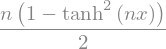

In [6]:
# Calculamos la derivada de la función respecto a x usando el comando diff 
diff( (tanh(n*x)+1)/2 , x)

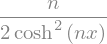

In [7]:
# También podemos pedirle a SymPy que simplifique la última expresión ("_" = última expresión)
simplify(_)

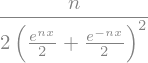

In [8]:
# O que reescriba la última expresión en términos de exponenciales
_.rewrite(exp)

Ahora podemos volver a usar NumPy y Matplotlib para graficar la sucesión Theta_n y su derivada para diferentes valores de n en forma numérica. Noten que uso m para la pendiente (para no confundirla con la variable simbólica n), y np.cosh para usar el coseno hiperbólico de NumPy (en lugar del de SimPy):

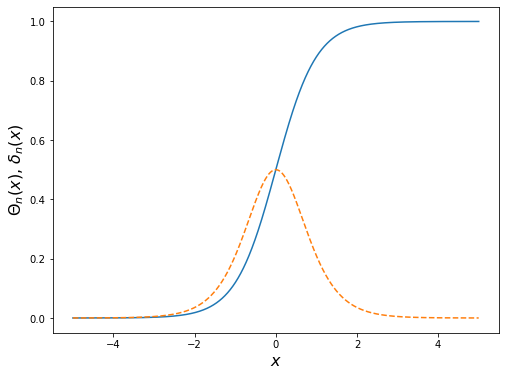

In [9]:
m = 1 # Elegimos un valor para la pendiente, prueben usar otros valores
plt.figure(figsize=(8,6))
plt.plot(y, heavi(y,m))
plt.plot(y, m/(2*np.cosh(m*y)**2), '--')
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$\Theta_n(x)$, $\delta_n(x)$',fontsize=16)
plt.show()